In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../data/host-density/adult-runs/instances/data-survival.i1.2020.May.27.03_06_35")
df.head()

,run,tick,lifestate,name
0,1,1.0,adult,Tick 5
1,1,1.0,adult,Tick 2
2,1,1.0,adult,Tick 0
3,1,1.0,adult,Tick 3
4,1,1.0,adult,Tick 1


In [4]:
# Helper

for run in df.groupby('run'):
    df = run[1]
    print("Run {} went {} days w/ {} Ixode".format(run[0], df['tick'].max(), df['name'].value_counts().count()))

Run 1 went 450.0 days w/ 24474 Ixode
Run 9 went 86.0 days w/ 10 Ixode
Run 17 went 450.0 days w/ 37591 Ixode
Run 25 went 450.0 days w/ 26871 Ixode
Run 33 went 86.0 days w/ 10 Ixode
Run 41 went 450.0 days w/ 26977 Ixode
Run 49 went 450.0 days w/ 81378 Ixode
Run 57 went 450.0 days w/ 48122 Ixode
Run 65 went 450.0 days w/ 17893 Ixode
Run 73 went 450.0 days w/ 29834 Ixode
Run 81 went 450.0 days w/ 14736 Ixode
Run 89 went 450.0 days w/ 29884 Ixode
Run 97 went 450.0 days w/ 40394 Ixode


In [5]:
#
# Parses parameter file and creates a dictionary that maps the habitat_suitability value with the
# corresponding run_number and host_density values
#
# { habitat: [ [run_number], [host_density] ] }
#
paramfile = "../data/host-density/adult-runs/instances/param_inputi1.txt"
paramd = {}
with open(paramfile, 'r') as file:
    for line in file:
        result = line.replace("\t",",").split(',')
# Try to add the values to an existing key, if that key does not exist, create it
        try:
            paramd[float(result[8])][0].append(int(result[0])) # add run number
            paramd[float(result[8])][1].append(float(result[4])) # add host density
        except KeyError:
            paramd[float(result[8])] = [[int(result[0])], [float(result[4])]]
# Helper
for k, v in paramd.items():
    print(k,v)


0.01 [[1, 41, 81], [0.1, 0.5, 0.9]]
0.09 [[9, 49, 89], [0.1, 0.5, 0.9]]
0.07 [[17, 57, 97], [0.2, 0.6, 1.0]]
0.05 [[25, 65], [0.3, 0.7]]
0.03 [[33, 73], [0.4, 0.8]]


In [16]:

ixode_count_dict = {}
df = pd.read_csv("../data/host-density/adult-runs/instances/data-survival.i1.2020.May.27.03_06_35")
for run in df.groupby('run'):
    current_df = run[1]
    ixode_count_dict[run[0]] = len(current_df['name'].unique())

In [17]:
# Creating a data frame from the above generated dictionary
df_final = pd.DataFrame(ixode_count_dict.items(), columns=['run', 'total_ixode'])
df_final['host_density'] = 0
df_final.dtypes

run             int64
total_ixode     int64
host_density    int64
dtype: object

In [18]:
# Iterate through parameter dictionary and use loc to find the row with the run number we want. Once we have this, add
# the host density value for that associated run
for key, value in paramd.items():
    for i in range(len(value[0])):
        # Both of these techniques work, but loc is preferred over chained indexing
        # df_final['host_density'][df_final['run'] == value[0][i]] = value[1][i]
        df_final.loc[df_final['run']==value[0][i], 'host_density'] = value[1][i]
        df_final.loc[df_final['run']==value[0][i], 'habitat_suitability'] = key

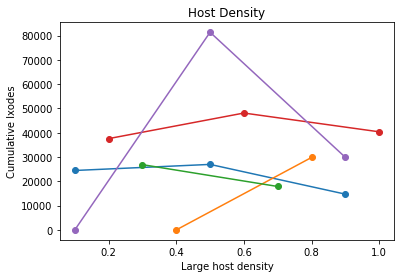

In [27]:
matplotlib.use('Qt5Agg')
fig = plt.figure()
for hab in df_final.groupby('habitat_suitability'):
    dat = hab[1]
    plt.plot('host_density', 'total_ixode' , data=dat, marker='o')
    plt.ylabel('Cumulative Ixodes')
    plt.xlabel('Large host density')
    plt.title("Host Density")
    # plt.legend() # FIX to show values not just label
# plt.show(block=True)
plt.savefig("../data/host-density/plots/host-densityi1.png")

